## Temp

In [5]:
import pandas as pd
import seaborn as sn


In [145]:
df = pd.read_csv('data/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
df

# df.voltage.quantile([0.25,0.5,0.75])

,Unnamed: 0,date,time,temperature,voltage,current,pf,frequency,status
0,0,19/08/2021,02:31:39,1,1,12,1,1,normal
1,1,19/08/2021,02:31:52,1,1,12,1,1,normal
2,2,20/08/2021,03:24:44,22,225,0,0,50,normal
3,3,20/08/2021,03:25:19,23,225,0,0,49,normal
4,4,24/08/2021,12:06:52,37,237,22,0,50,normal
...,...,...,...,...,...,...,...,...,...
16759,16759,05/09/2021,05:25:02,31,1,-1,-1,-1,normal
16816,16816,05/09/2021,05:52:45,30,-1,-100,-1,-1,normal
16859,16859,05/09/2021,06:11:55,30,0,-1,-1,-1,normal
17020,17020,06/09/2021,07:29:33,30,-1,0,-1,-1,normal


In [142]:
# def clean(df):
df_temp =  df[['date','time','temperature']]	
df_temp = df_temp[df_temp['temperature'] > 1]
df_temp = df_temp[df_temp['temperature'] <= 100]
df_temp = df_temp[(df_temp['temperature'] >= 20) & (df_temp['temperature'] <= 50)]
df_temp

,date,time,temperature


array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

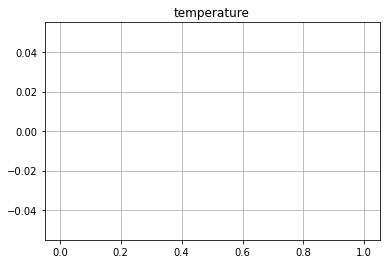

In [143]:
df_temp[['temperature']].hist(bins =100)

In [144]:
q25,q75 = df_temp['temperature'].quantile([0.25,0.75])
q5,q95 = df_temp['temperature'].quantile([0.05,0.95])

In [137]:
print(q75, q25,iqr*1.5)
iqr = q75 - q25


26.25 26.0 16.5


In [138]:
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print(lower_temp, upper_temp)

25.625 26.625


In [139]:
print(q5,q95)

26.0 27.0


## Vol

In [327]:
import pandas as pd

In [512]:
df = pd.read_csv('data/R1L1-R1-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]

df


,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,20:19:17,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
1,1,20/08/2021,20:30:52,29,223,223,223,222,223,223,...,0,0,0,50,50,50,50,50,50,normal
2,2,20/08/2021,20:31:53,29,223,223,223,222,223,223,...,0,0,0,50,50,50,50,50,50,normal
3,3,20/08/2021,20:40:04,30,223,223,223,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
4,4,20/08/2021,20:40:39,30,223,224,224,1,1,1,...,1,1,1,49,50,50,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18017,18017,05/09/2021,17:05:13,44,239,237,238,237,239,236,...,0,0,0,50,50,50,50,49,50,normal
18705,18705,05/09/2021,22:39:06,39,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
19017,19017,05/09/2021,01:07:03,37,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
20709,20709,06/09/2021,14:52:16,34,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [513]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [514]:
# def clean(df):
focus = 'voltage_6'
df_temp =  df[['date','time', focus]]	
df_temp = df_temp[df_temp[focus] > 200]
df_temp = df_temp[df_temp[focus] <= 300]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_temp

,date,time,voltage_6
1,20/08/2021,20:30:52,223
2,20/08/2021,20:31:53,223
13,20/08/2021,22:18:07,223
14,20/08/2021,22:18:18,223
15,20/08/2021,22:18:30,222
...,...,...,...
18013,05/09/2021,17:04:26,236
18014,05/09/2021,17:04:38,237
18015,05/09/2021,17:04:50,236
18016,05/09/2021,17:05:01,236


array([[<AxesSubplot:title={'center':'voltage_6'}>]], dtype=object)

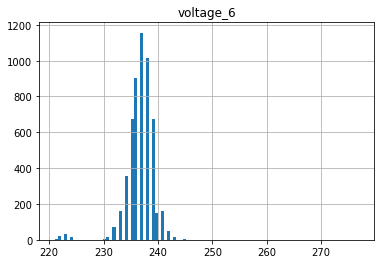

In [515]:
df_temp[[focus]].hist(bins =100)

In [516]:
q25,q75 = df_temp[focus].quantile([0.25,0.75])
q5,q95 = df_temp[focus].quantile([0.05,0.95])

iqr = q75 - q25
lower_temp = q25 - (2*iqr)
upper_temp = q75 + (2*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q5,q95))

critical: 232.0,242.0
alert: 233.0,240.0


## Current

In [38]:
import pandas as pd

In [460]:
df = pd.read_csv('data/R1L1-R1-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,20:19:17,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
1,1,20/08/2021,20:30:52,29,223,223,223,222,223,223,...,0,0,0,50,50,50,50,50,50,normal
2,2,20/08/2021,20:31:53,29,223,223,223,222,223,223,...,0,0,0,50,50,50,50,50,50,normal
3,3,20/08/2021,20:40:04,30,223,223,223,1,1,1,...,1,1,1,50,50,50,1,1,1,normal
4,4,20/08/2021,20:40:39,30,223,224,224,1,1,1,...,1,1,1,49,50,50,1,1,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18017,18017,05/09/2021,17:05:13,44,239,237,238,237,239,236,...,0,0,0,50,50,50,50,49,50,normal
18705,18705,05/09/2021,22:39:06,39,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
19017,19017,05/09/2021,01:07:03,37,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
20709,20709,06/09/2021,14:52:16,34,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [461]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [462]:
# def clean(df):
focus = 'current_2'
df_focus =  df[['date','time', focus]]	

df_focus = df_focus[df_focus[focus] > 1]
df_focus = df_focus[df_focus[focus] < 100]

# df_focus = df_focus[df_focus[focus] > 60]
# df_focus = df_focus[df_focus[focus] == 0]

# df_focus = df[(df[focus] >= -1) & (df[focus] <= 1)]
df_focus

,date,time,current_2
44,20/08/2021,22:29:53,3
83,24/08/2021,12:06:15,34
84,24/08/2021,12:06:27,34
85,24/08/2021,12:06:38,34
86,24/08/2021,12:06:50,34
...,...,...,...
18013,05/09/2021,17:04:26,97
18014,05/09/2021,17:04:38,86
18015,05/09/2021,17:04:50,86
18016,05/09/2021,17:05:01,86


array([[<AxesSubplot:title={'center':'current_2'}>]], dtype=object)

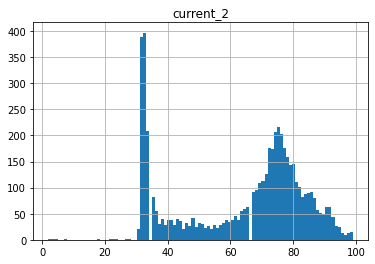

In [463]:
df_focus[[focus]].hist(bins = 100)

In [375]:
q25,q75 = df_focus[focus].quantile([0.25,0.75])
q5,q95 = df_focus[focus].quantile([0.05,0.95])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q5,q95))

critical: 10.0,10.0
alert: 10.0,11.0


In [376]:
q1,q99 = df_focus[focus].quantile([0.01,0.99])
print('critical: {0},{1}'.format(q1,q99))

critical: 10.0,11.0


## PF/f

In [711]:
import pandas as pd

In [755]:
df = pd.read_csv('data/R1L1-J3-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,20/08/2021,00:08:08,28,227,227,227,227,227,227,...,0,0,0,50,50,50,50,50,50,normal
1,1,20/08/2021,00:08:41,28,227,226,227,228,228,228,...,0,0,0,49,50,50,49,49,49,normal
2,2,20/08/2021,00:08:53,28,227,227,227,227,227,227,...,0,0,0,49,49,50,49,49,49,normal
3,3,20/08/2021,00:09:04,28,227,227,228,227,227,227,...,0,0,0,49,49,49,50,49,50,normal
4,4,20/08/2021,00:09:27,28,228,227,228,227,227,228,...,0,0,0,50,49,49,50,50,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,03/09/2021,09:58:18,41,238,238,240,237,239,241,...,0,0,0,50,50,50,50,50,50,normal
300,300,03/09/2021,10:06:37,49,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
483,483,03/09/2021,11:30:15,50,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
876,876,03/09/2021,14:52:31,43,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [756]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'temperature', 'voltage_1', 'voltage_2',
       'voltage_3', 'voltage_4', 'voltage_5', 'voltage_6', 'current_1',
       'current_2', 'current_3', 'current_4', 'current_5', 'current_6', 'pf_1',
       'pf_2', 'pf_3', 'pf_4', 'pf_5', 'pf_6', 'frequency_1', 'frequency_2',
       'frequency_3', 'frequency_4', 'frequency_5', 'frequency_6', 'status'],
      dtype='object')

In [757]:
# def clean(df):
focus = 'frequency_3'
df_focus =  df[['date','time', focus]]	
df_focus = df_focus[df_focus[focus] > 10]
df_focus = df_focus[df_focus[focus] < 100]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_focus

,date,time,frequency_3
0,20/08/2021,00:08:08,50
1,20/08/2021,00:08:41,50
2,20/08/2021,00:08:53,50
3,20/08/2021,00:09:04,49
4,20/08/2021,00:09:27,49
...,...,...,...
278,03/09/2021,09:56:34,50
279,03/09/2021,09:56:46,50
280,03/09/2021,09:56:57,50
281,03/09/2021,09:58:07,49


array([[<AxesSubplot:title={'center':'frequency_3'}>]], dtype=object)

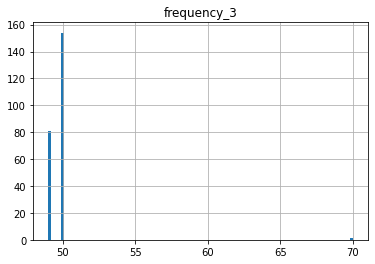

In [758]:
df_focus[[focus]].hist(bins =100)